In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/kaggle/titanic.zip (Unzipped Files)/train.csv")

In [ ]:
test = pd.read_csv("/content/drive/MyDrive/kaggle/titanic.zip (Unzipped Files)/test.csv")

In [ ]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## checking how much data is missing

In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
train.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

## function to fill null values

In [ ]:
def impute_nan(train, variable, median):
  train[variable+"_median"] = train[variable].fillna(median)
  train[variable+"_random"]=train[variable]
  random_sample = train["Age"].dropna().sample(train['Age'].isnull().sum(), random_state=0)
  random_sample.index=train[train['Age'].isnull()].index
  train.loc[train[variable].isnull(),variable+'_random']=random_sample

In [ ]:
median = train.Age.median()

In [ ]:
impute_nan(train, 'Age', median)

In [ ]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_median,Age_random
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,35.0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,28.0,28.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,54.0,54.0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,2.0,2.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,27.0,27.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,14.0,14.0


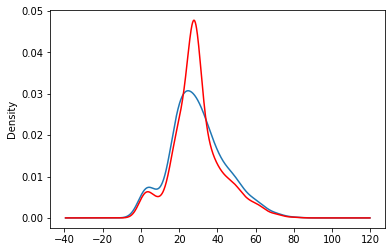

In [ ]:
fig = plt.figure() 
ax = fig.add_subplot(111)
train['Age'].plot(kind='kde', ax=ax)
train.Age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()

## random sample Imputation
Here we replace the NaN values with random observations from the  data set
This is done when data missing at completely random

In [ ]:
##drop na values
train["Age"].dropna().sum()

21205.17

In [ ]:
## def randon_impute(train, variable, median):
## train[variable+"_random"]=train[variable]
## random_sample = train["Age"].dropna().sample(train['Age'].isnull().sum(), random_state=0)
## train[train['Age'].isnull()].index
## train.loc[train[variable].isnull(),variable+'_random']=random_sample

In [ ]:
##plot for the random sample imputation

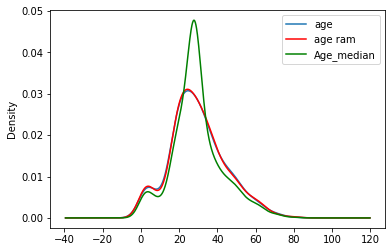

In [ ]:
fig = plt.figure() 
ax = fig.add_subplot(111)
train['Age'].plot(kind='kde', ax=ax, label="age")
train.Age_random.plot(kind='kde', ax=ax, color='red', label="age random")
train.Age_median.plot(kind='kde', ax=ax, color='green')
ax.legend(lines, labels, loc="best")

In [ ]:
## ADvantages
## less distortion in variance and easy to implement
##disadvantage
##wont work in evry scenario

## capturing nan with new feature

works well when you have data that are not missing completely at random

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/kaggle/titanic.zip (Unzipped Files)/train.csv", usecols=["Age","Fare","Survived"])

In [ ]:
train.head(5)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
train["Age_NaN"] = np.where(train["Age"].isnull(),1,0)

In [ ]:
train.head(10)

,Survived,Age,Fare,Age_NaN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,NaN,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


In [ ]:
median = train.Age.median()

In [ ]:
train["Age"].fillna(median,inplace=True)

In [ ]:
train.head(10)

,Survived,Age,Fare,Age_NaN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


#### advantages
easy to implement
caoture importance of missing values if we want to provide that info  to the ML Model
#### disadvantages
increases the dimensionality

## END OF DISTRIBUTION IMPUTATION

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/kaggle/titanic.zip (Unzipped Files)/train.csv", usecols=["Age","Fare","Survived"])

In [ ]:
train.head(10)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
5,0,NaN,8.4583
6,0,54.0,51.8625
7,0,2.0,21.0750
8,1,27.0,11.1333
9,1,14.0,30.0708


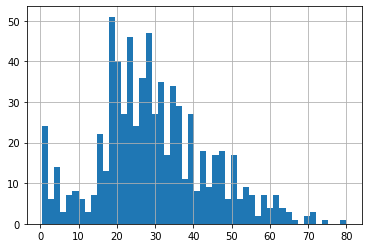

In [ ]:
train.Age.hist(bins=50)

In [ ]:
extreme=train.Age.mean()+3*train.Age.std()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


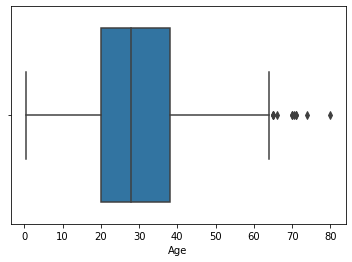

In [ ]:
import seaborn as sns
sns.boxplot("Age", data=train)

In [ ]:
def impute_extreme(train,variable,median,extreme):
  train[variable+"extremedistribution"] = train[variable].fillna(extreme)
  train[variable].fillna(median,inplace=True)

In [ ]:
median = train.Age.median()

In [ ]:
impute_extreme(train,"Age",median,extreme)

In [ ]:
train.drop("Age_extremedistribution", axis="columns", inplace = True)

In [ ]:
train.head(15)

,Survived,Age,Fare,Ageextremedistribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


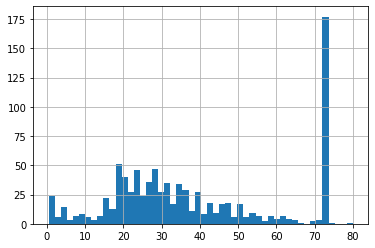

In [ ]:
train["Ageextremedistribution"].hist(bins=50)


### ADVANTAGES
easy to implement
know importance of missing data

### DISADVANTAGES
DISTORTION OF original distribution
if missingness not important , then it will mask prediction of original variable
if num of NA big, it will mask the true outlier
if num of NA smol, then it will be considered outlier

In [ ]:
!sudo apt install git

Reading package lists... Done
Building dependency tree       
Reading state information... Done
git is already the newest version (1:2.17.1-1ubuntu0.9).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [ ]:
git clone https://github.com/neethj/feature-engineering
cd feature-engineering

SyntaxError: ignored